<h1>Peru Drone Data Analysis</h1>

In [ ]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = [20, 12]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Exploring the Data

Basic stats about the dataset are listed here.



In [ ]:
!ls drive/My\ Drive/UNICEF/Data_Sources/Drone_Peru

hourly_measurement_qh007_unicef.csv  hourly_measurement_qh012_unicef.csv
hourly_measurement_qh008_unicef.csv  hourly_measurement_qh013_unicef.csv
hourly_measurement_qh010_unicef.csv  hourly_measurement_qh014_unicef.csv
hourly_measurement_qh011_unicef.csv


In [ ]:
#Loading the Data
data1 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh007_unicef.csv')
data2 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh008_unicef.csv')
data3 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh010_unicef.csv')
data4 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh011_unicef.csv')
data5 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh012_unicef.csv')
data6 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh013_unicef.csv')
data7 = pd.read_csv('/content/drive/My Drive/UNICEF/Data_Sources/Drone_Peru/hourly_measurement_qh014_unicef.csv')
data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data.head()

,id,timestamp,CO,H2S,NO2,O3,PM25,PM10,SO2,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature
0,1163,2/1/20 22:00,5154.745,136.396,20.345,34.520,23.462,62.860,74.963,-12.072736,-77.082687,7,NaN,NaN,NaN,NaN,NaN
1,1167,2/2/20 00:00,2163.171,136.791,52.492,82.650,48.187,163.557,56.500,-12.072736,-77.082687,7,NaN,NaN,NaN,NaN,NaN
2,1172,2/2/20 01:00,314.576,35.891,10.669,26.707,49.247,182.902,36.165,-12.072736,-77.082687,7,NaN,NaN,NaN,NaN,NaN
3,1177,2/2/20 02:00,319.242,36.507,7.661,22.529,57.579,229.367,37.875,-12.072736,-77.082687,7,NaN,NaN,NaN,NaN,NaN
4,1180,2/2/20 03:00,264.433,33.225,4.439,18.902,58.963,243.991,34.688,-12.072736,-77.082687,7,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['id', 'timestamp', 'CO', 'H2S', 'NO2', 'O3', 'PM25', 'PM10', 'SO2',
       'lat', 'lon', 'qhawax_id', 'uv', 'spl', 'humidity', 'pressure',
       'temperature'],
      dtype='object')

In [ ]:
#no. of unique values
feats_counts = data.nunique(dropna = False)
feats_counts.sort_values()[:10]

qhawax_id          7
lon               21
lat               21
uv              3681
timestamp       4149
SO2             6365
temperature    10613
O3             12679
PM25           14866
spl            14869
dtype: int64

In [ ]:
data.describe()

,id,CO,H2S,NO2,O3,PM25,PM10,SO2,lat,lon,qhawax_id,uv,spl,humidity,pressure,temperature
count,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,27456.000000,22056.000000,22063.000000,22056.000000,22056.000000,22056.000000
mean,16155.934623,595.508667,20.342179,55.509469,45.409643,11.439036,30.028470,47.555177,-12.065563,-77.046053,10.656723,0.666364,64.265515,84.884248,99916.906549,19.475378
std,8630.362787,708.305233,46.819373,78.702281,196.570818,11.595794,35.715342,271.486013,0.026377,0.028262,2.378113,1.334359,11.762543,11.223036,485.057236,3.676046
min,1116.000000,0.000000,-756.812000,-545.963000,-31.544000,0.000000,0.000000,-68.846000,-12.109723,-77.083000,7.000000,0.000000,35.733000,39.443000,98880.507000,12.904000
25%,8653.750000,1.482500,0.296750,20.622750,0.000000,5.424000,13.409000,0.000000,-12.103056,-77.071945,8.000000,0.000000,56.909500,78.637000,99527.511000,16.607750
50%,15946.500000,294.294500,11.739000,30.537500,0.583000,8.823500,22.756500,0.000000,-12.054722,-77.050552,11.000000,0.000000,61.905000,88.290500,99804.174000,18.790500
75%,23496.250000,1033.398000,32.182250,52.534000,26.449250,13.905500,36.733000,2.761000,-12.043889,-77.029724,13.000000,0.720250,67.030500,93.570250,100357.245750,21.660250
max,31838.000000,17012.924000,4653.777000,3295.416000,2088.543000,227.766000,2363.536000,2810.824000,-12.040000,-76.989000,14.000000,8.649000,113.604000,99.300000,101077.947000,32.895000


In [ ]:
#nan values
data.isnull().sum()

id                0
timestamp         0
CO                0
H2S               0
NO2               0
O3                0
PM25              0
PM10              0
SO2               0
lat               0
lon               0
qhawax_id         0
uv             5400
spl            5393
humidity       5400
pressure       5400
temperature    5400
dtype: int64

In [ ]:
# number of values which are non zero (includes nans)
data.astype(bool).sum(axis=0)

id             27456
timestamp      27456
CO             21357
H2S            21757
NO2            25423
O3             16921
PM25           24622
PM10           24622
SO2            13486
lat            27456
lon            27456
qhawax_id      27456
uv             15485
spl            27456
humidity       27456
pressure       27456
temperature    27456
dtype: int64

# Change in the daily mean of pollutant concentrations in a global view

How the levels of pollutants are varying, taking their global daily average.( Just for a rough estimation, doesn’t necessarily  represent the true scores)

In [ ]:
#conversion
data[["timestamp"]] = data[["timestamp"]].astype("datetime64")
data["Datedate"] = data["timestamp"].dt.to_period("d")
data["DateMonth"] = data["timestamp"].dt.to_period("M")

In [ ]:
data_date = data.groupby("Datedate").mean().drop(["id","lat","lon","qhawax_id","uv","spl","humidity","pressure","temperature"], axis=1)
data_date

,CO,H2S,NO2,O3,PM25,PM10,SO2
Datedate,,,,,,,
2020-02-01,660.551235,38.826843,82.369608,25.973765,16.254824,42.298529,90.142745
2020-02-02,1765.839687,42.288716,78.760761,16.737821,30.114687,85.623657,241.455761
2020-02-03,1003.238479,2.612197,32.739859,32.519085,33.773972,105.783493,191.941225
2020-02-04,333.866129,30.436057,28.882886,22.644321,30.174564,93.582564,165.096571
2020-02-05,316.620083,27.860417,38.812708,21.376933,35.100950,128.416892,145.384675
...,...,...,...,...,...,...,...
2020-07-27,1173.528208,24.196179,50.016226,15.819804,7.995643,23.178429,1.857952
2020-07-28,1054.811345,22.085911,43.820720,19.552607,9.397661,22.496476,1.687827
2020-07-29,1153.860922,25.296725,48.149599,19.693305,11.236581,25.534719,1.916916


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f91540aa6d8>,
      dtype=object)

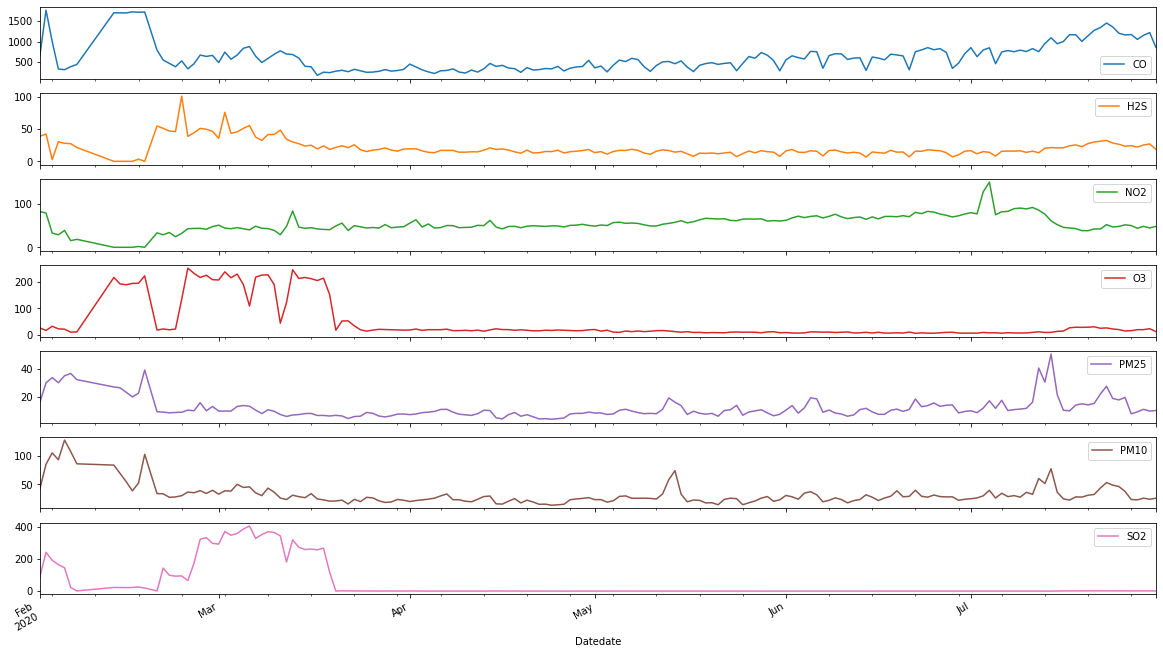

In [ ]:
data_date.plot.line(subplots=True, figsize=(20, 12))

# Change in the daily mean of pollutant concentrations in a local view

How the levels of pollutants are varying, taking their local daily average. (lats are unique)

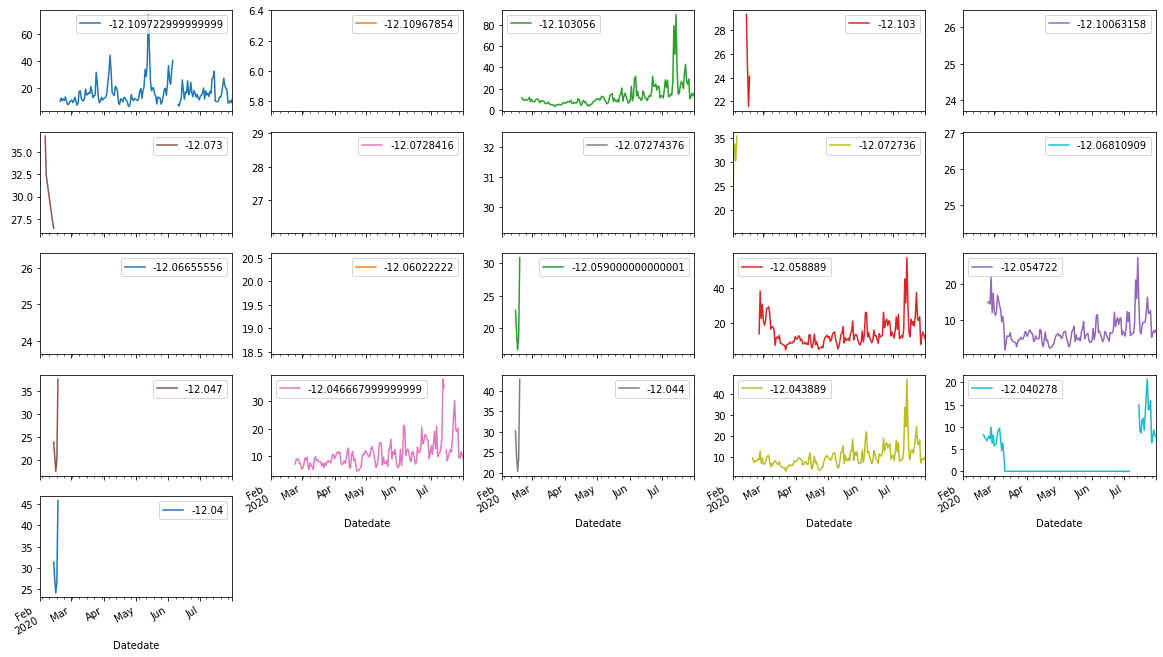

In [ ]:
dummy = data.copy()
dummy.drop(["id","qhawax_id","uv","spl","humidity","pressure","temperature","DateMonth"], axis=1, inplace=True)
loc_data = dummy.groupby(["Datedate","lat"]).mean()["PM25"].unstack().plot(subplots=True, layout=(5,5))

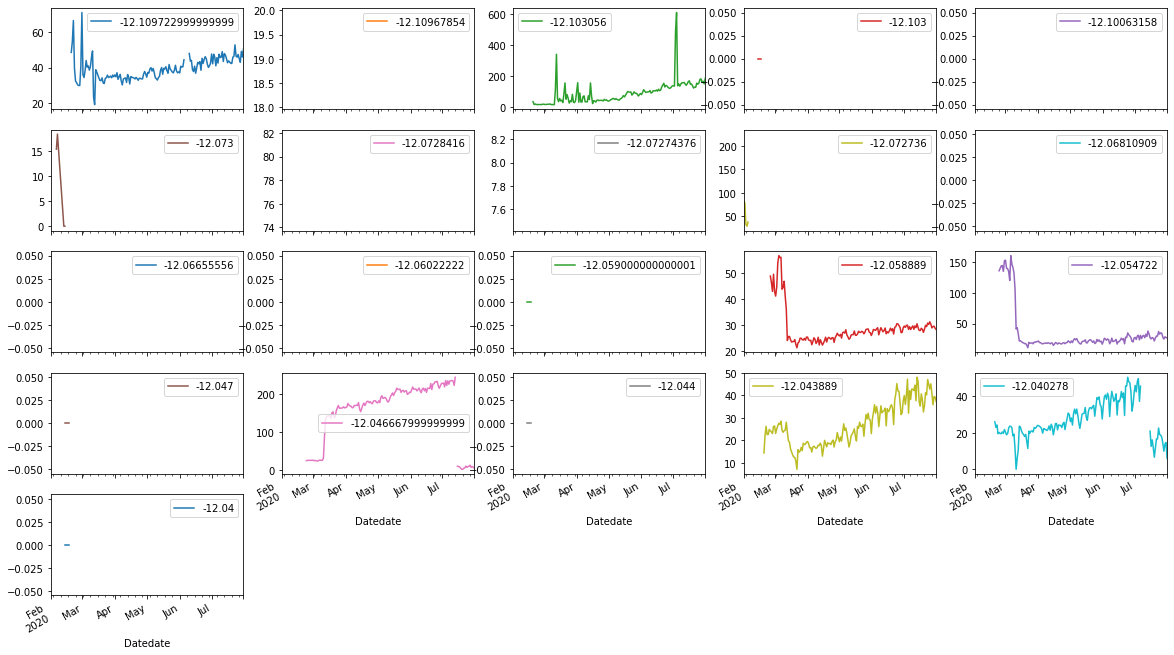

In [ ]:
loc_data1 = dummy.groupby(["Datedate","lat"]).mean()["NO2"].unstack().plot(subplots=True, layout=(5,5))

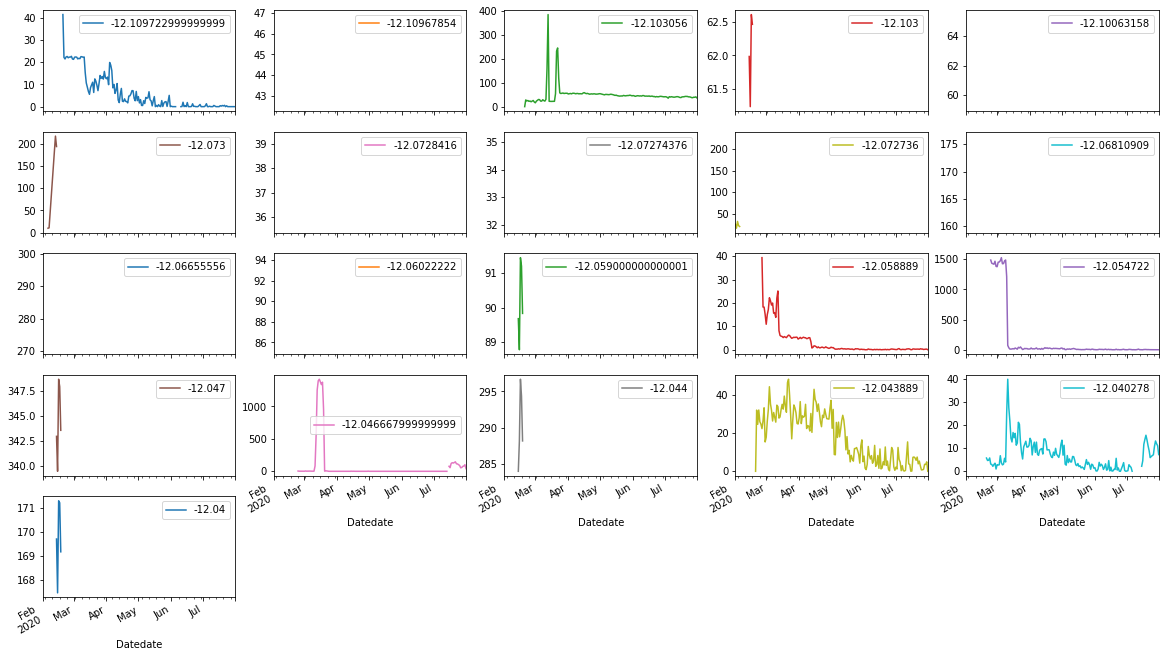

In [ ]:
loc_data2 = dummy.groupby(["Datedate","lat"]).mean()["O3"].unstack().plot(subplots=True, layout=(5,5))

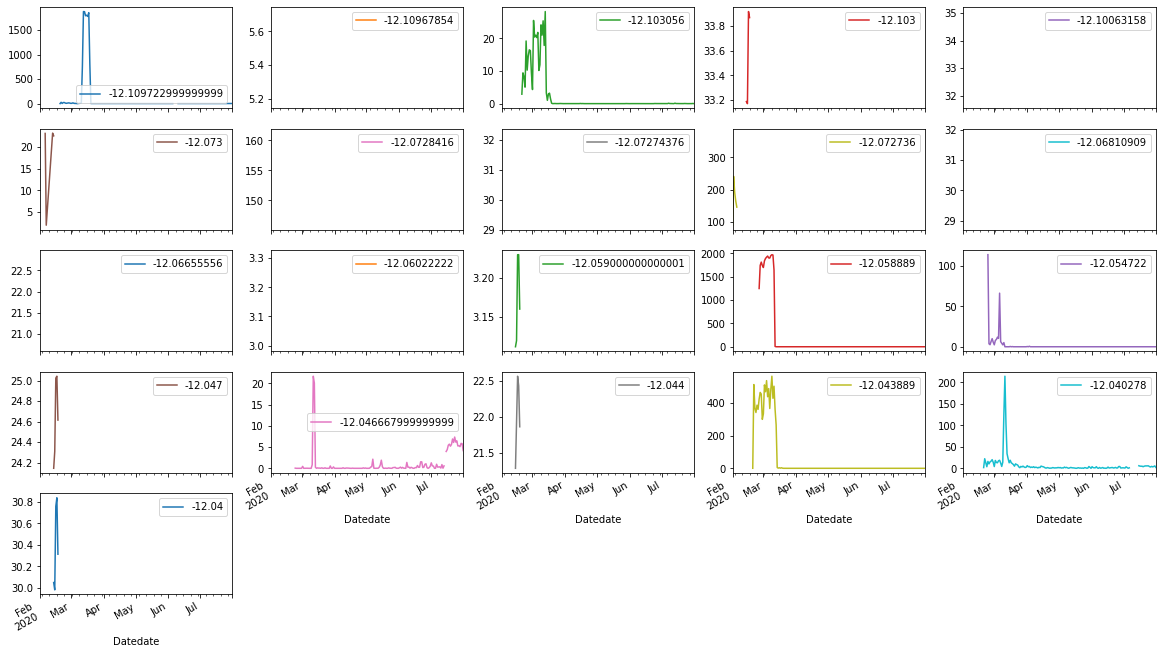

In [ ]:
loc_data3 = dummy.groupby(["Datedate","lat"]).mean()["SO2"].unstack().plot(subplots=True, layout=(5,5))

In [ ]:
feats_counts = check.nunique(dropna = False).drop(["lat","lon"], axis=1)
feats_counts.sort_values(by=["PM25"])

,timestamp,CO,H2S,NO2,O3,PM25,PM10,SO2,Datedate
lat,,,,,,,,,
-12.066556,1,1,1,1,1,1,1,1,1
-12.109679,1,1,1,1,1,1,1,1,1
-12.100632,1,1,1,1,1,1,1,1,1
-12.072744,1,1,1,1,1,1,1,1,1
-12.060222,1,1,1,1,1,1,1,1,1
-12.068109,1,1,1,1,1,1,1,1,1
-12.072842,1,4,4,4,4,4,4,4,1
-12.103000,76,67,1,1,75,76,76,65,4
-12.044000,95,94,1,1,95,95,95,94,5


**Comments:**

Some of these locations have only one data point and we can consider removing it; or adding it to the nearest location.

There is potentially an opportunity to concatenate adjacent locations, since some of them have similar plots. For instance (-12.040, -12.044, -12.047, -12.059) among others


# Day-Level Analysis

1.   During which time of the day was pollutant concentration the highest?
2.   How did the pollutant concentration change during the day?


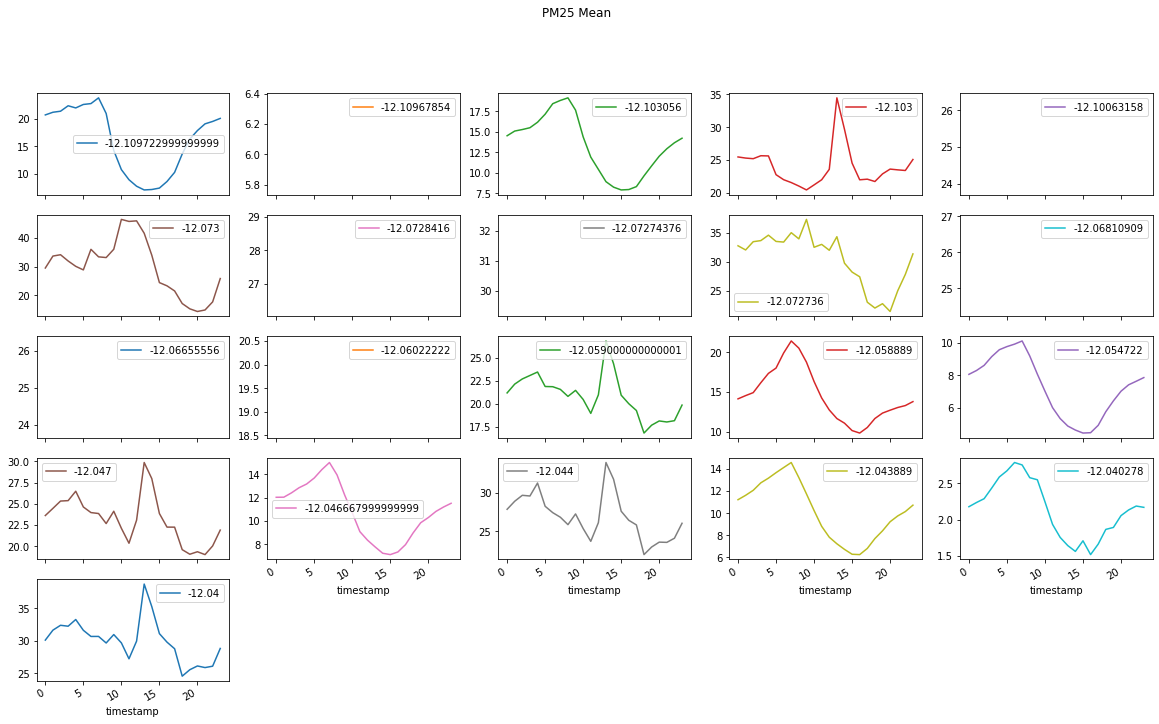

In [ ]:
daygroup_data = data.groupby([data["timestamp"].dt.hour,"lat"])["PM25"].mean()
_ = daygroup_data.unstack().plot(subplots=True, layout=(5,5), title="PM25 Mean")

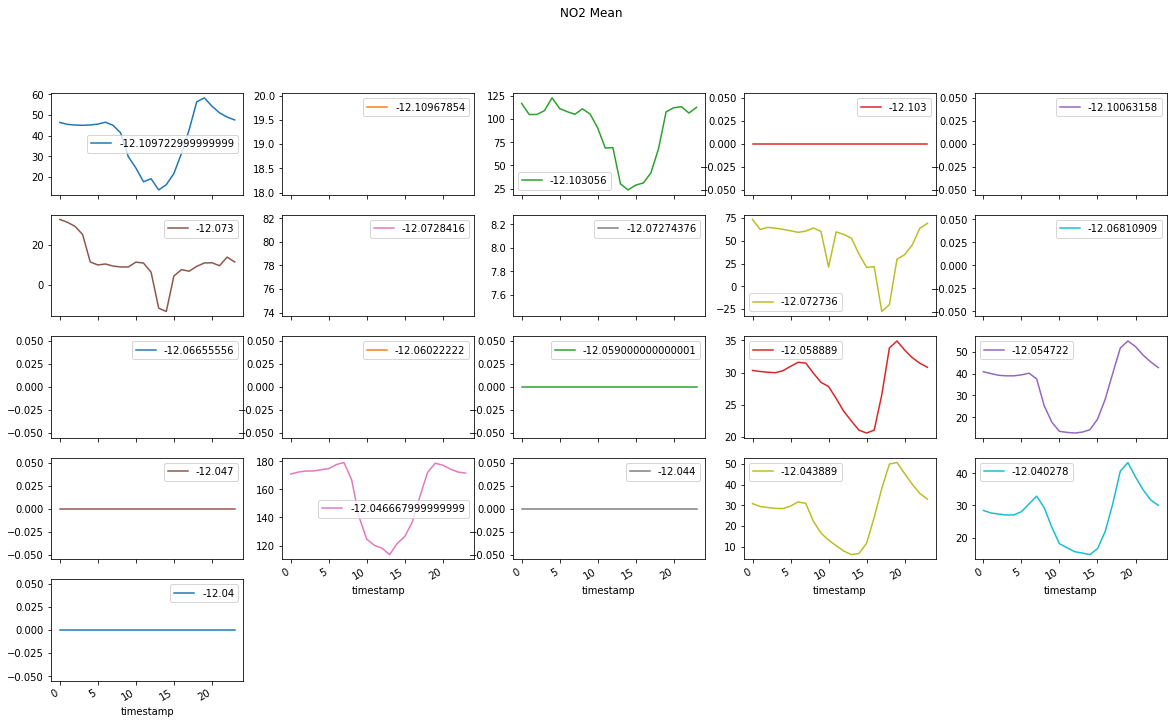

In [ ]:
daygroup_data = data.groupby([data["timestamp"].dt.hour,"lat"])["NO2"].mean()
_ = daygroup_data.unstack().plot(subplots=True, layout=(5,5), title="NO2 Mean")

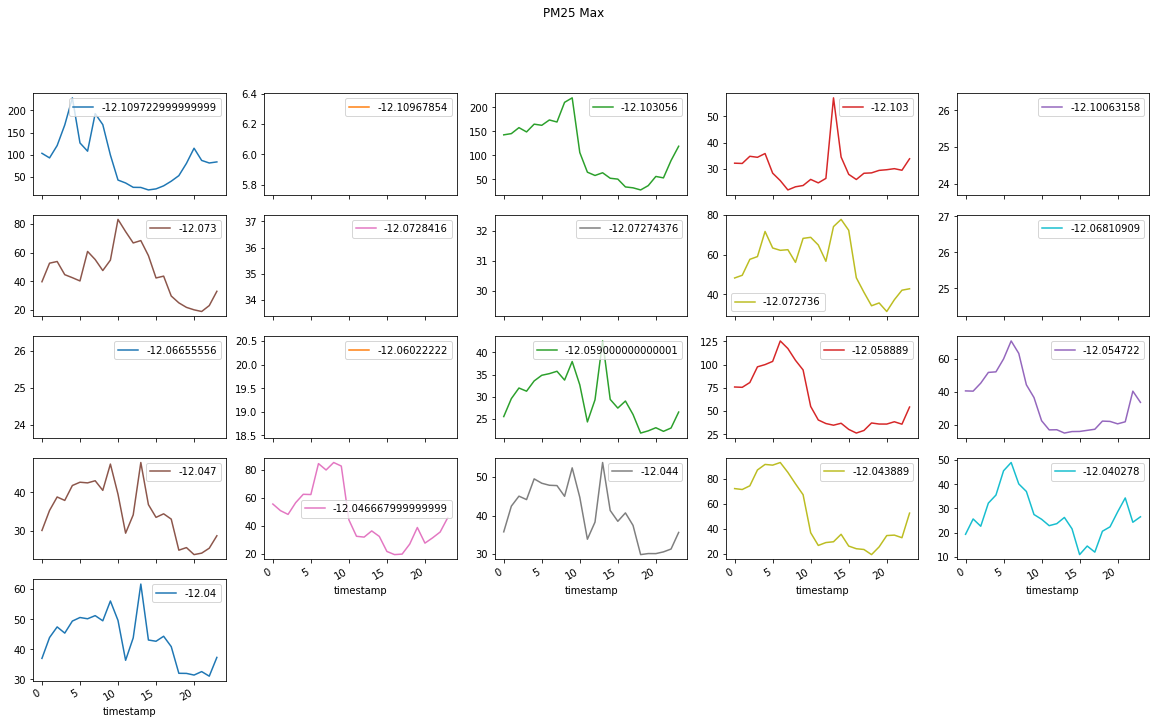

In [ ]:
daygroup_data = data.groupby([data["timestamp"].dt.hour,"lat"])["PM25"].max()
_ = daygroup_data.unstack().plot(subplots=True, layout=(5,5), title="PM25 Max")

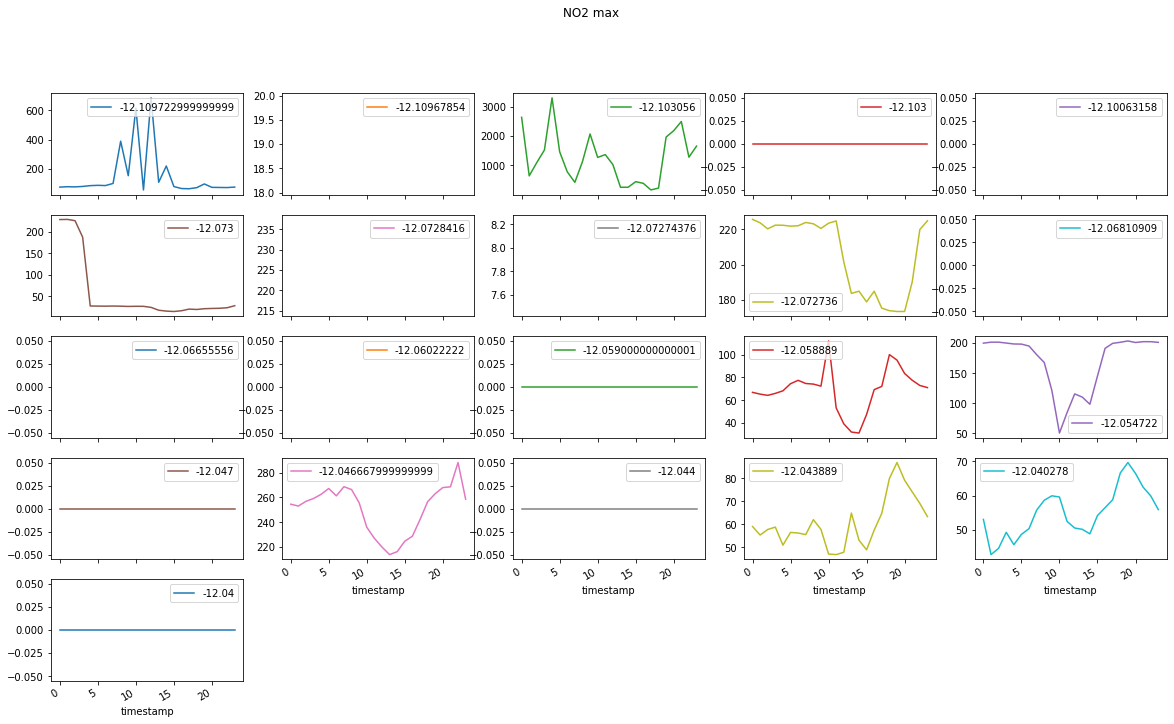

In [ ]:
daygroup_data = data.groupby([data["timestamp"].dt.hour,"lat"])["NO2"].max()
_ = daygroup_data.unstack().plot(subplots=True, layout=(5,5), title="NO2 max")

# Tackling [uv, humidity, temperature, spl, pressure]



1.   Fill in the missing values in the above fields
2.   Is there a way through which we can find some relation between these and the pollution levels.



# Abnormalities and Interpretabilty

1.    Any abnormalities in the dataset?
2.    How do we make this data relevant and usable?
